In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

heart_attack_data = pd.read_csv('heart.csv')
X = heart_attack_data.drop(columns = ['output'])
Y = heart_attack_data['output']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict( X_test )

score = accuracy_score(Y_test, predictions)
score

0.8524590163934426

In [50]:
heart_attack_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# heart_attack_data = pd.read_csv('heart.csv')
# X = heart_attack_data.drop(columns = ['output'])
# Y = heart_attack_data['output']

# model = DecisionTreeClassifier()
# model.fit(X, Y)

model = joblib.load('heart_attack-detection.joblib')
predictions = model.predict( [ [54, 1, 1, 135, 300, 0, 1, 170, 0, 1.5, 0.9, 1, 0] ])
predictions

array([1], dtype=int64)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

heart_attack_data = pd.read_csv('heart.csv')

X = heart_attack_data.drop('output', axis = 1).copy()
y = heart_attack_data['output'].copy()

X_encoded = pd.get_dummies(X, columns = ['cp',
                                        'restecg',
                                         'slp',
                                        'thall'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)


[Text(446.0829545454546, 387.315, 'thall_2 <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = YES'),
 Text(241.58863636363637, 346.545, 'caa <= 0.5\ngini = 0.392\nsamples = 101\nvalue = [74, 27]\nclass = NO'),
 Text(163.59545454545454, 305.775, 'exng <= 0.5\ngini = 0.497\nsamples = 48\nvalue = [26, 22]\nclass = NO'),
 Text(98.91818181818182, 265.005, 'age <= 50.0\ngini = 0.426\nsamples = 26\nvalue = [8, 18]\nclass = YES'),
 Text(60.872727272727275, 224.235, 'fbs <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = NO'),
 Text(45.654545454545456, 183.465, 'chol <= 215.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = NO'),
 Text(30.436363636363637, 142.695, 'chol <= 191.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = NO'),
 Text(15.218181818181819, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NO'),
 Text(45.654545454545456, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = YES'),
 Text(60.872727272727275, 142.695, 

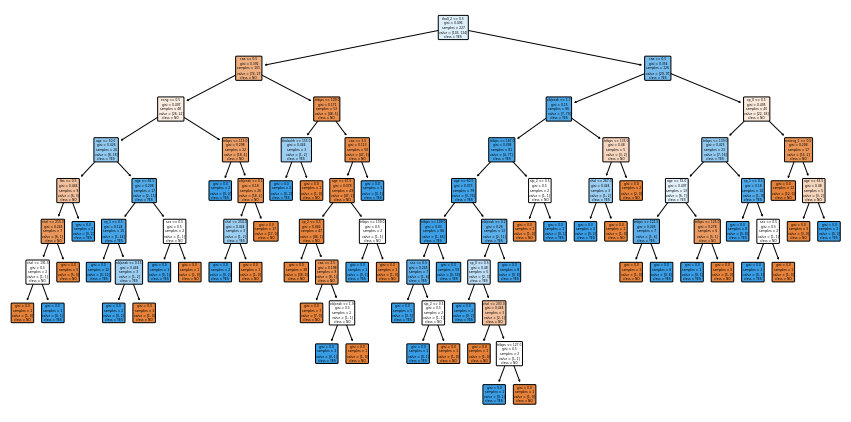

In [94]:
plt.figure(figsize = (15,7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ["NO", "YES"],
         feature_names = X_encoded.columns)

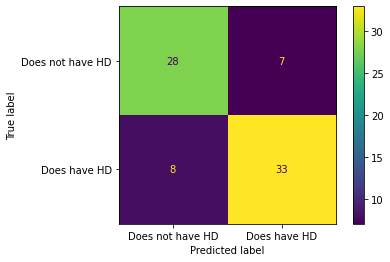

In [96]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["Does not have HD", "Does have HD"])

In [97]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

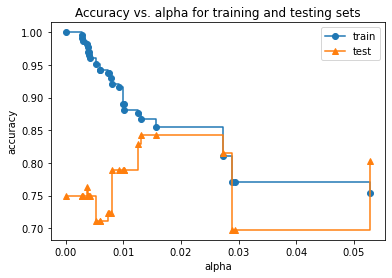

In [103]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs. alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = '^', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

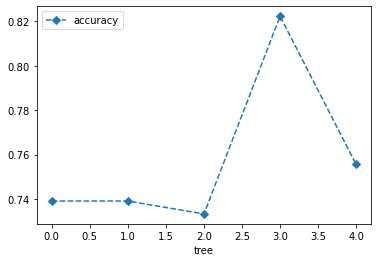

In [128]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.013)

scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df.plot(x = 'tree', y='accuracy', marker = 'D', linestyle = '--')

<AxesSubplot:xlabel='alpha'>

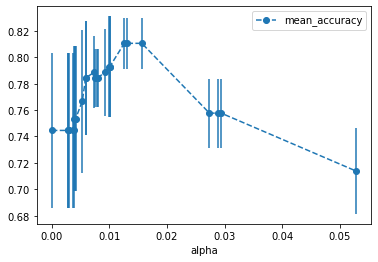

In [134]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 4)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x = 'alpha',
                  y = 'mean_accuracy',
                  yerr = 'std',
                  marker = 'o',
                  linestyle = '--')

In [143]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.012)
                                &
                                (alpha_results['alpha'] < 0.0127)]['alpha']

ideal_ccp_alpha = float(ideal_ccp_alpha)

0.012579413412661354

In [144]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42,
                                      ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

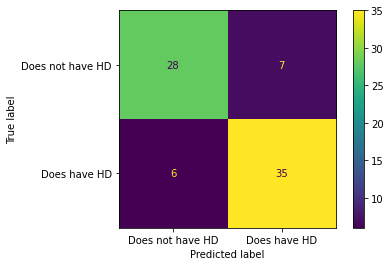

In [145]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels = ["Does not have HD", "Does have HD"])

[Text(488.25, 366.93, 'thall_2 <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = YES'),
 Text(348.75, 285.39, 'caa <= 0.5\ngini = 0.392\nsamples = 101\nvalue = [74, 27]\nclass = NO'),
 Text(279.0, 203.85000000000002, 'exng <= 0.5\ngini = 0.497\nsamples = 48\nvalue = [26, 22]\nclass = NO'),
 Text(139.5, 122.31, 'age <= 50.0\ngini = 0.426\nsamples = 26\nvalue = [8, 18]\nclass = YES'),
 Text(69.75, 40.77000000000004, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = NO'),
 Text(209.25, 40.77000000000004, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]\nclass = YES'),
 Text(418.5, 122.31, 'trtbps <= 115.0\ngini = 0.298\nsamples = 22\nvalue = [18, 4]\nclass = NO'),
 Text(348.75, 40.77000000000004, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = YES'),
 Text(488.25, 40.77000000000004, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = NO'),
 Text(418.5, 203.85000000000002, 'gini = 0.171\nsamples = 53\nvalue = [48, 5]\nclass = NO'),
 Text(627.75, 285.39, 'caa <= 0.5\ngini = 

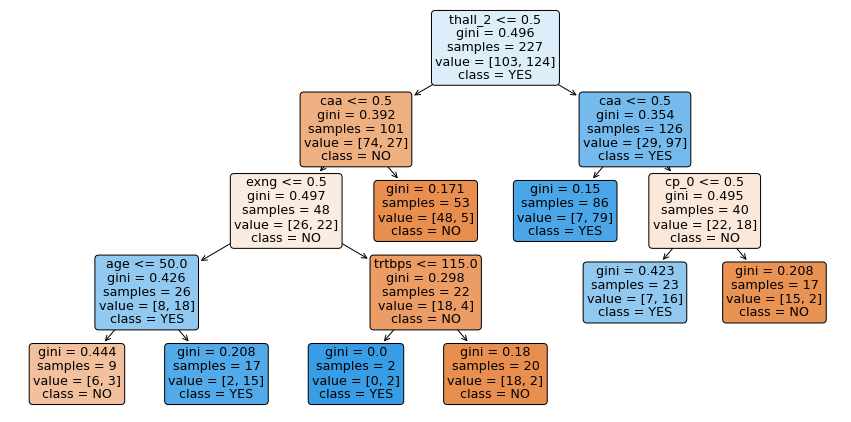

In [146]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names = ["NO", "YES"],
         feature_names = X_encoded.columns)